# Freelancing Platforms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as msno
import autoreload
import os
import csv
import sys

from collections import defaultdict, Counter

%matplotlib inline

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

sb.set_style('whitegrid')

In [2]:
df = pd.read_csv("D:\Open Classroom\Datasets\Freelance Platform Projects\Freelance Platform Projects.csv")
df.head()

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Create Educational Course Website Wordpress Wo...,Technology & Programming,Intermediate ($$),Website Development,GBP,200.0,remote,ALL,fixed_price,2023-01-26 21:00:45,"Hello,\n\nI already have the Domain for the we...",NaN,2023-01-19,Sale,United Kingdom,GBP,NaN
1,Virtual Assistant,Business,Expert ($$$),Administration Assistance,GBP,1000.0,remote,ALL,fixed_price,2023-01-26 20:17:49,We are looking for a talented Virtual Assistan...,NaN,2023-01-26,London,United Kingdom,GBP,NaN
2,Welcome Online coaching fitness pack,Design,Entry ($),Illustration & Drawing,GBP,60.0,remote,ALL,fixed_price,2023-01-26 20:06:34,Hi i need a online coaching welcome pack made\...,NaN,2022-09-28,Sheffield,United Kingdom,GBP,NaN
3,SEO Optomised Content Required For An Accounta...,Writing & Translation,Expert ($$$),Content Writing,GBP,80.0,remote_country,GB,fixed_price,2023-01-26 19:45:03,We have a word-press site being designed and b...,1 - 2 weeks,2020-09-02,London,United Kingdom,GBP,Creative Designer
4,YOUTUBE CHANNEL,Social Media,Intermediate ($$),YouTube Marketing,USD,100.0,remote,ALL,fixed_price,2023-01-26 19:34:45,Hi James based on your message following is th...,NaN,2010-09-19,Purfleet,United Kingdom,USD,Diector


### Statistical Data Representation

In [3]:
df.shape

(934, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 17 columns):
Title                        934 non-null object
Category Name                934 non-null object
Experience                   934 non-null object
Sub Category Name            934 non-null object
Currency                     934 non-null object
Budget                       934 non-null float64
Location                     934 non-null object
Freelancer Preferred From    934 non-null object
Type                         934 non-null object
Date Posted                  934 non-null object
Description                  934 non-null object
Duration                     138 non-null object
Client Registration Date     934 non-null object
Client City                  934 non-null object
Client Country               934 non-null object
Client Currency              934 non-null object
Client Job Title             376 non-null object
dtypes: float64(1), object(16)
memory usage: 124.2+ KB


In [5]:
df.isnull().sum()

Title                          0
Category Name                  0
Experience                     0
Sub Category Name              0
Currency                       0
Budget                         0
Location                       0
Freelancer Preferred From      0
Type                           0
Date Posted                    0
Description                    0
Duration                     796
Client Registration Date       0
Client City                    0
Client Country                 0
Client Currency                0
Client Job Title             558
dtype: int64

### Graphical Presentation

Text(0.5, 1, 'Pearsons Correlation of Column variables')

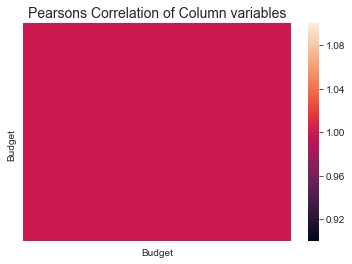

In [6]:
sb.heatmap(df.corr())
plt.title('Pearsons Correlation of Column variables', fontsize=(14))

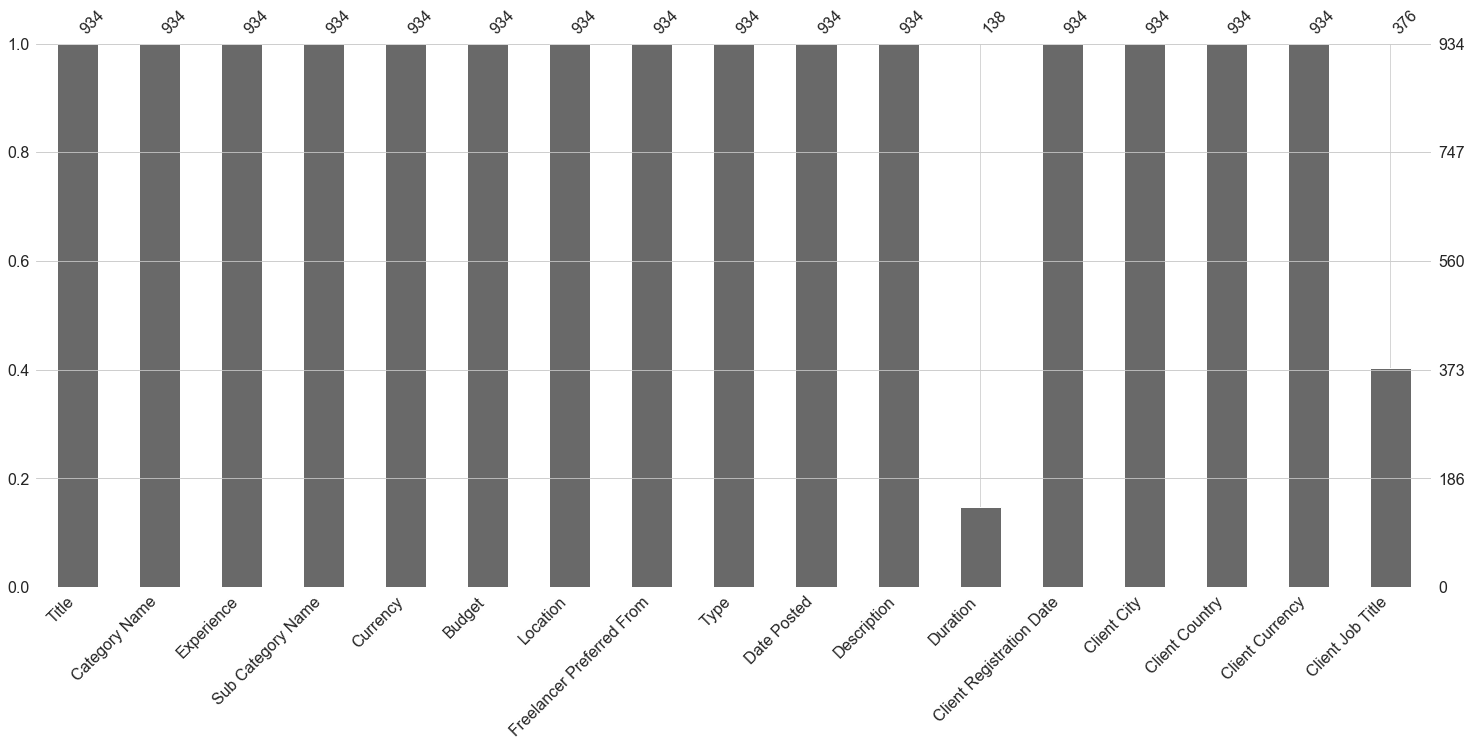

In [7]:
msno.bar(df)

### Data Cleaning and Manipulation
- Drop unnecessary columns

In [8]:
df.head(2)

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Duration,Client Registration Date,Client City,Client Country,Client Currency,Client Job Title
0,Create Educational Course Website Wordpress Wo...,Technology & Programming,Intermediate ($$),Website Development,GBP,200.0,remote,ALL,fixed_price,2023-01-26 21:00:45,"Hello,\n\nI already have the Domain for the we...",NaN,2023-01-19,Sale,United Kingdom,GBP,NaN
1,Virtual Assistant,Business,Expert ($$$),Administration Assistance,GBP,1000.0,remote,ALL,fixed_price,2023-01-26 20:17:49,We are looking for a talented Virtual Assistan...,NaN,2023-01-26,London,United Kingdom,GBP,NaN


In [9]:
df.drop(columns = ['Duration', 'Client Job Title'], inplace = True)
df.head(2)

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Create Educational Course Website Wordpress Wo...,Technology & Programming,Intermediate ($$),Website Development,GBP,200.0,remote,ALL,fixed_price,2023-01-26 21:00:45,"Hello,\n\nI already have the Domain for the we...",2023-01-19,Sale,United Kingdom,GBP
1,Virtual Assistant,Business,Expert ($$$),Administration Assistance,GBP,1000.0,remote,ALL,fixed_price,2023-01-26 20:17:49,We are looking for a talented Virtual Assistan...,2023-01-26,London,United Kingdom,GBP


## Exploratory Data Analysis

Text(0, 0.5, '')

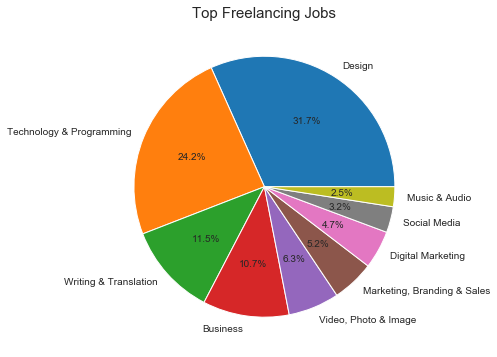

In [10]:
plt.figure(figsize=(8, 6))
plt.title('Top Freelancing Jobs', fontsize=(15))
df['Category Name'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel(None)

- Conclusion, we note that Designing top the chart with whooping 31.7%, Technology & Programming comes in 2nd with 24.2% and on the 3rd position is Writing & Translation freelancing jobs with 11.5% surpassing Business and Video, Photo & Image jobs as we close the Top 5 most demanding Freelacing jobs

In [11]:
df['Experience'] = df['Experience'].str.replace('$', '')
df['Experience'] = df['Experience'].str.replace('(', '')
df['Experience'] = df['Experience'].str.replace(')', '')
df['Experience'].value_counts()#.head()

Expert           424
Entry            412
Intermediate      98
Name: Experience, dtype: int64

Text(0.5, 1.0, 'Level of Experience for job Expectancy')

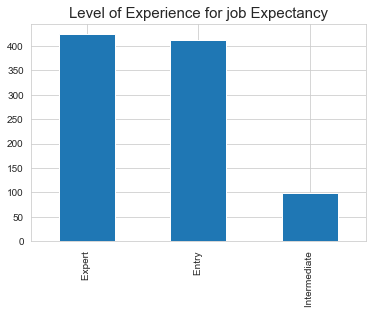

In [12]:
df['Experience'].value_counts().plot(kind = 'bar')
plt.title('Level of Experience for job Expectancy', fontsize = (15))

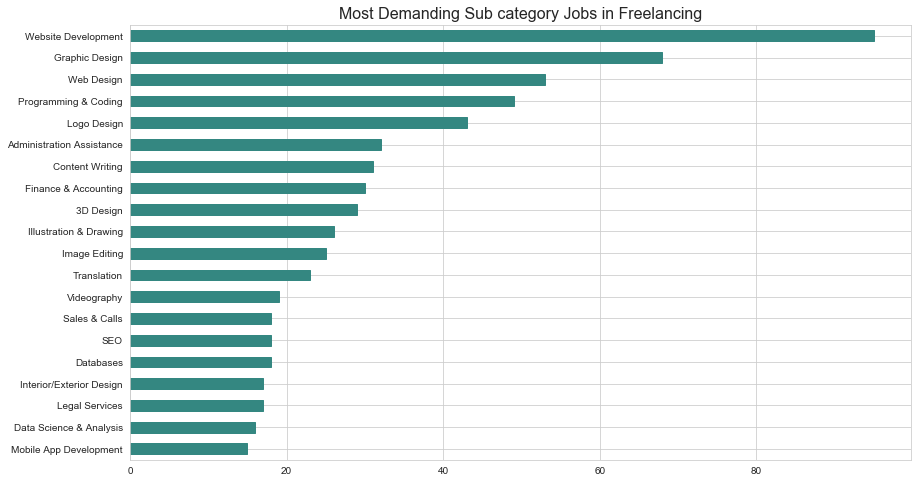

In [13]:
plt.figure(figsize = (14, 8))
bar = df['Sub Category Name'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh')
plt.title('Most Demanding Sub category Jobs in Freelancing', fontsize = (16))
for i in bar.patches:
    if i.get_width() > 400:
        i.set_color("#f85e5e")
    elif i.get_width() > 200:
        i.set_color("#42b7bd")
    else:
        i.set_color("#348781")

In [14]:
df.head(2)

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Create Educational Course Website Wordpress Wo...,Technology & Programming,Intermediate,Website Development,GBP,200.0,remote,ALL,fixed_price,2023-01-26 21:00:45,"Hello,\n\nI already have the Domain for the we...",2023-01-19,Sale,United Kingdom,GBP
1,Virtual Assistant,Business,Expert,Administration Assistance,GBP,1000.0,remote,ALL,fixed_price,2023-01-26 20:17:49,We are looking for a talented Virtual Assistan...,2023-01-26,London,United Kingdom,GBP


In [15]:
budget = df.groupby('Category Name')
budget = budget['Budget'].sum().sort_values(ascending = False).to_frame()
budget

,Budget
Category Name,
Technology & Programming,74550.0
Design,32639.0
Writing & Translation,13557.0
Business,11353.0
"Video, Photo & Image",8339.0
"Marketing, Branding & Sales",7276.0
Digital Marketing,5141.0
Social Media,4610.0
Music & Audio,1553.0


Text(0.5, 1.0, 'Budget Score based on Job Category')

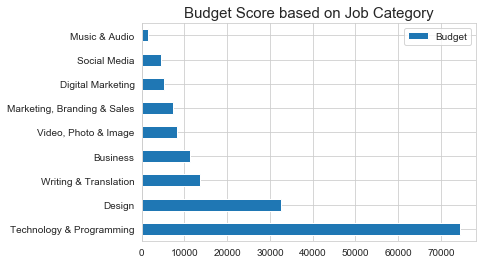

In [16]:
budget.plot(kind = 'barh')
plt.ylabel(None)
plt.title('Budget Score based on Job Category', fontsize = (15))

Its now factual that Technology & Programming jobs are the sexiest jobs in the market top our score sheet with highest paid jobs. 

- **We dive deep into Technology & Programming to determine which sub group has the most paid job, and hottest in the market.**

In [17]:
tech_prog = df[df['Category Name'] == 'Technology & Programming']
tech_prog['Category Name'].value_counts()

Technology & Programming    226
Name: Category Name, dtype: int64

In [18]:
sub_cat_tech_prog = tech_prog.groupby('Sub Category Name')
sub_plot = sub_cat_tech_prog['Budget'].sum().sort_values(ascending = False).to_frame()
sub_plot

,Budget
Sub Category Name,
Website Development,30726.0
Mobile App Development,14016.0
ERP/CRM Development,9985.0
Programming & Coding,8482.0
Data Science & Analysis,2989.0
CMS Development,2705.0
Databases,2466.0
eCommerce CMS Development,1286.0
Game Development,1182.0


Text(0.5, 1.0, 'Technology & Programming Sub Groups')

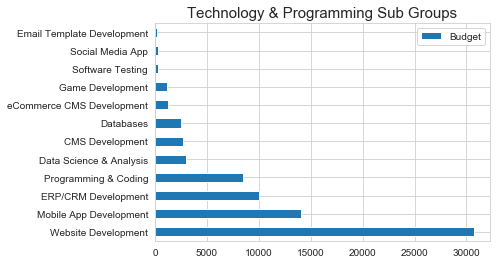

In [19]:
sub_plot.plot(kind = 'barh')
plt.ylabel(None)
plt.title('Technology & Programming Sub Groups', fontsize=(15))

In [20]:
sub_cat_tech_prog['Budget'].mean().round(2).sort_values().to_frame()

,Budget
Sub Category Name,
Email Template Development,56.67
Social Media App,85.00
Databases,137.00
Software Testing,144.00
eCommerce CMS Development,160.75
Programming & Coding,173.10
Data Science & Analysis,186.81
Website Development,323.43
CMS Development,386.43


In [21]:
tech_prog['Budget'].mean()

329.86725663716817

### **Technology & Programming**

Being the leading jobs in the freelance workspace, we dive deep to our research and realize that Website Development is leading with a whooping 30726 GBP.
Here's a list ranked from highest value field downwards
- Website Development	    30726.0
- Mobile App Development	14016.0
- ERP/CRM Development	    9985.0
- Programming & Coding	    8482.0
- Data Science & Analysis	2989.0
- CMS Development	        2705.0
- Databases	                2466.0
- eCommerce CMS Development	1286.0
- Game Development	        1182.0
- Software Testing	        288.0
- Social Media App	        255.0
- Email Template Development	170.0

However, in as much as Website Development is leading in the market, on average you can make alot in 
- ERP/CRM Development	1426.43 
- Mobile App Development 934.40

Anyway you're probably to make over 330 GBP in tech in an Entry level job

In [22]:
df.head(2)

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Create Educational Course Website Wordpress Wo...,Technology & Programming,Intermediate,Website Development,GBP,200.0,remote,ALL,fixed_price,2023-01-26 21:00:45,"Hello,\n\nI already have the Domain for the we...",2023-01-19,Sale,United Kingdom,GBP
1,Virtual Assistant,Business,Expert,Administration Assistance,GBP,1000.0,remote,ALL,fixed_price,2023-01-26 20:17:49,We are looking for a talented Virtual Assistan...,2023-01-26,London,United Kingdom,GBP


In [23]:
df['Location'].value_counts().to_frame()

,Location
remote,860
remote_country,65
onsite,9


In [24]:
df['Type'].value_counts().to_frame()

,Type
fixed_price,788
hourly,146


In [25]:
df['Client City'].value_counts().head(10).to_frame()

,Client City
London,167
City of London,31
Manchester,24
Birmingham,19
Leeds,12
Milton Keynes,8
Reading,8
Dublin,8
Nottingham,8
Tallinn,8


In [26]:
df['Client Country'].value_counts().head(10).to_frame()

,Client Country
United Kingdom,641
United States,53
India,26
Italy,16
Spain,14
France,12
Australia,12
Ireland,10
Canada,10
Netherlands,10


In [27]:
df.head(2)

,Title,Category Name,Experience,Sub Category Name,Currency,Budget,Location,Freelancer Preferred From,Type,Date Posted,Description,Client Registration Date,Client City,Client Country,Client Currency
0,Create Educational Course Website Wordpress Wo...,Technology & Programming,Intermediate,Website Development,GBP,200.0,remote,ALL,fixed_price,2023-01-26 21:00:45,"Hello,\n\nI already have the Domain for the we...",2023-01-19,Sale,United Kingdom,GBP
1,Virtual Assistant,Business,Expert,Administration Assistance,GBP,1000.0,remote,ALL,fixed_price,2023-01-26 20:17:49,We are looking for a talented Virtual Assistan...,2023-01-26,London,United Kingdom,GBP


### **Feature Engineering**
Build a Recommendation system that prompts user for the type of job they looking for and return all potential related fields suited for the same field.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel

In [29]:
tf_vect = TfidfVectorizer(min_df=3, max_features=None, ngram_range=(1,3), 
                          stop_words='english', strip_accents='unicode')

df['Description'] = df['Description'].fillna('')

desc_matrix = tf_vect.fit_transform(df['Description'])

In [30]:
sig = sigmoid_kernel(desc_matrix, desc_matrix)

In [31]:
indices = pd.Series(df.index, df['Category Name']).drop_duplicates()

In [32]:
indices['Business'].head()

Business     1
Business    25
Business    30
Business    35
Business    43
dtype: int64

In [34]:
sig[indices['Business']]

array([[0.76159458, 0.76172025, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159453],
       [0.76159606, 0.76159688, 0.76159685, ..., 0.7615969 , 0.7615948 ,
        0.76159765],
       [0.76159516, 0.761596  , 0.76159416, ..., 0.76159416, 0.76159788,
        0.76160075],
       ...,
       [0.76159465, 0.76159505, 0.76159823, ..., 0.76159514, 0.76159897,
        0.7616003 ],
       [0.7615944 , 0.76159416, 0.76159464, ..., 0.76159465, 0.76159427,
        0.76159552],
       [0.76159885, 0.76159453, 0.76159547, ..., 0.76159702, 0.76160655,
        0.76172025]])

In [53]:
def manual_testing(cat, sig=sig):
    category_list = [x for x in df['Category Name']]
    if cat in category_list:
        idx = indices[cat]
        cat_list = list(enumerate(sig[idx]))
        sort_cat = sorted(cat_list, key=lambda x: x[1], reverse=True)
        top_cat = sort_cat[0:10]
        recommended = [x[0] in top_cat]
        return df[['Category Name', 'Sub Category Name', 'Experience', 'Title', 'Description']].iloc[recommended].sort_values(by = ["Experience", "Title"], ascending = False)


In [52]:
manual_testing('Business')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()